# ADDDM Case Study I: Heliotronics - Estimating an Experience Curve

Group 11:

*   Yasaman Sadat Mirrezaei Roudaki
*   Zeynep Gultug Aydemir

# Setting Up

We're installing and importing the libraries we'll be needing to complete the analysis.

In [ ]:
install.packages('lm.beta')
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(lm.beta)

Cleaning the memory before we start working on a new analysis is always a good practice.

In [ ]:
rm(list=ls())

# Q1 - Log Transformation

We start by exploring the data and the variables.

In [ ]:
data = read.csv("Case_Study_1.csv")

In [ ]:
colnames(data)=c("X_number_of_solar_panels", "Y_manufacturing_cost")

In [ ]:
data

X_number_of_solar_panels,Y_manufacturing_cost
<int>,<dbl>
100,1250.0
200,1108.7
300,1053.5
400,1033.4
500,989.8
600,999.0
700,914.9
800,931.0
900,922.3


It seems that our data has one dependent Y (manufacturing cost) and one independent X (number of solar panels) variable. Now let's make a scatter plot to observe the trend and the relationship between these variables closer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


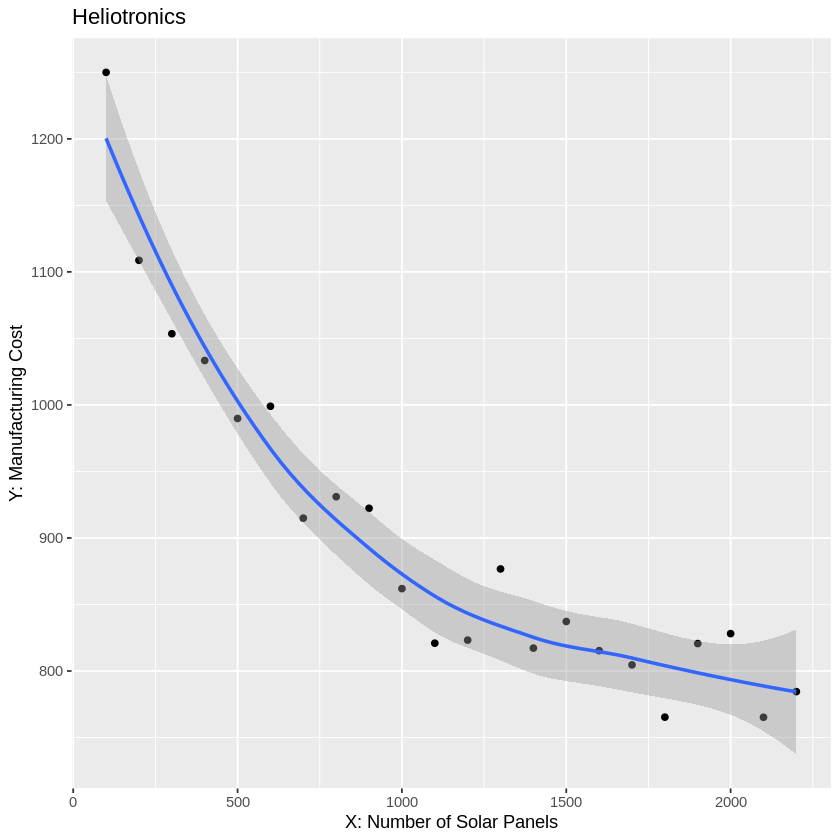

In [ ]:
ggplot(data, aes(x = X_number_of_solar_panels, y = Y_manufacturing_cost)) +
  geom_point() +
  geom_smooth()+
  ggtitle("Heliotronics") +
  xlab("X: Number of Solar Panels") +
  ylab("Y: Manufacturing Cost")

According to the exploration and visual assessment of Heliotronics’ manufacturing costs suggest a potential fit with the multiplicative learning model. The declining values in the 'manufacturing_cost'(y) as 'number_of_solar_panels' (X) increases are consistent with the experience curve concept, where the cost per unit decreases with the accumulated production.

However, a log transformation of the data before building the regression model is necessary to confirm the model's applicability.

If we assume that a linear relationship is present, we should expect the data points to align with a straight line after we plot the log-transformed manufacturing costs and number of solar panels. In this case, this would indicate that the multiplicative learning model is indeed a good fit for the dataset.

So we continue our studies by adding the log10 transformed columns of both X and y values:

In [ ]:
data=data%>%mutate(X_log10_number_of_solar_panels=log10(X_number_of_solar_panels))
data=data%>% mutate(Y_log10_manufacturing_cost=log10(Y_manufacturing_cost))

In [ ]:
data

X_number_of_solar_panels,Y_manufacturing_cost,X_log10_number_of_solar_panels,Y_log10_manufacturing_cost
<int>,<dbl>,<dbl>,<dbl>
100,1250.0,2.000000,3.096910
200,1108.7,2.301030,3.044814
300,1053.5,2.477121,3.022635
400,1033.4,2.602060,3.014268
500,989.8,2.698970,2.995547
600,999.0,2.778151,2.999565
700,914.9,2.845098,2.961374
800,931.0,2.903090,2.968950
900,922.3,2.954243,2.964872


Now that we applied the log10 transformation on the data, we can visualize again to see how the plot has changed.

`geom_smooth()` using formula = 'y ~ x'


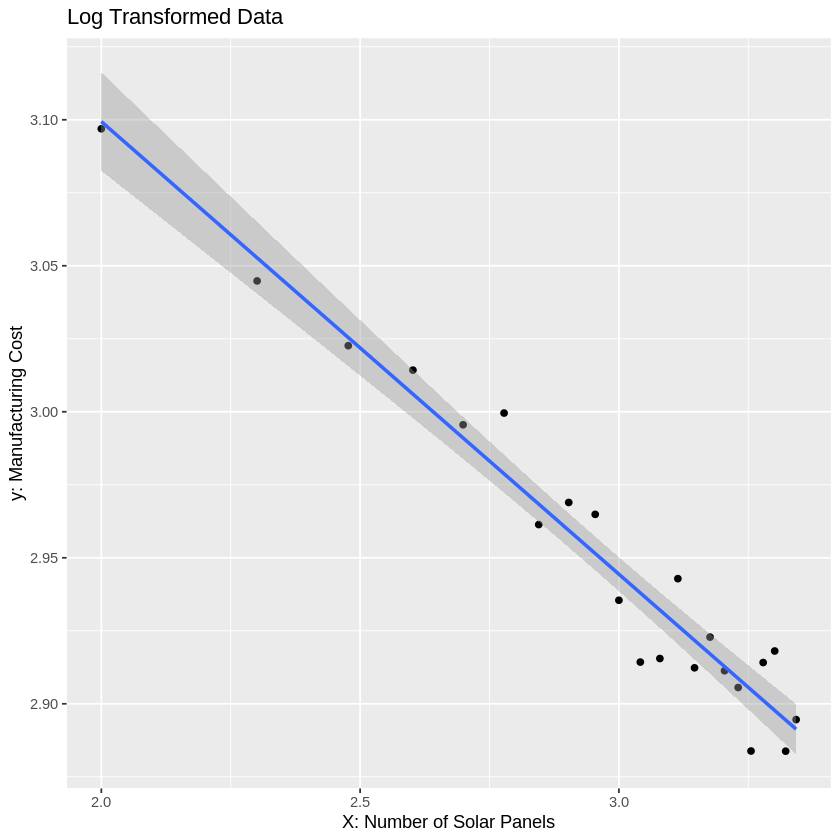

In [ ]:
ggplot(data, aes(x = X_log10_number_of_solar_panels, y = Y_log10_manufacturing_cost)) +
  geom_point() +
  geom_smooth(method="lm")+
  ggtitle("Log Transformed Data") +
  xlab("X: Number of Solar Panels") +
  ylab("y: Manufacturing Cost")

Indeed, the scatter plot with log-transformed data indicates rhe presence of a linear trend line and supports the applicability of the multiplicative learning model for Heliotronics’ manufacturing costs.

From this plot, we can now conclude that the multiplicative model Y=AX^b is suitable for the dataset since the log transformation has linearized the relationship, allowing us to practice the linear regression techniques.

The slope of the trend line in this plot will give an estimate of our parameter 'b', which represents the experience curve effect in the model.

# Q2 - Regression Model & Learning Rate

Now we move forward by fitting our model with the log-transformed data: manufacturing costs as dependent dependent variable and number of solar panels as the independent variable.

In [ ]:
model=with(data,lm(Y_log10_manufacturing_cost~X_log10_number_of_solar_panels))

In [ ]:
summary(model)


Call:
lm(formula = Y_log10_manufacturing_cost ~ X_log10_number_of_solar_panels)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023675 -0.008668 -0.001944  0.009214  0.020800 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.409353   0.023629  144.28  < 2e-16 ***
X_log10_number_of_solar_panels -0.154991   0.007936  -19.53  1.7e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01299 on 20 degrees of freedom
Multiple R-squared:  0.9502,	Adjusted R-squared:  0.9477 
F-statistic: 381.4 on 1 and 20 DF,  p-value: 1.701e-14


The regression analysis results displays a strong linear relationship between the variables and high value of the adjusted R-squared (0.9477) confirms that the model explains a significant proportion of the variability in the manufacturing costs.

The slope of the regression line is calculated as -0.154991, which represents the experience parameter 'b' when retransformed from the logarithmic scale.

In [ ]:
slope = -0.154991 # experience parameter, b (multiplied by -1 already)
intercept = 3.409353 # the production cost of the first unit, A

To interpret this value in terms of the learning rate, the progress ratio is calculated as 2^(-b).

In [ ]:
progress_ratio = 2 ** slope
progress_ratio

[1] 0.898138

The progress ratio is approximately 0.898.

This tells us that each time the cumulative production doubles, the manufacturing cost per unit falls to 89.8% of the previous cost.

And finally we calculate the learning rate is calculated as
(1−progress ratio)×100.

In [ ]:
learning_rate = 1 - progress_ratio
learning_rate

[1] 0.101862

Which gives us an approximate value of 0.102.

This means that for every doubling of the total number of solar panels produced, the manufacturing cost per unit decreases by about 10.2%.

Based on the results of this regression analysis, the multiplicative learning model fits well with Heliotronics' data, and the company experiences a 10.2% reduction in manufactiring costs per unit with each doubling of cumulative production. This learning rate can be used to estimate future costs and set competitive bidding strategies for the company.

# Q3 - Experience Curve & Prediction

In [ ]:
# Experience Curve: A+X*b
# We calculate log10(Y) for X units
# Then we take the antilog to find Y
experience_curve <- function(x) {
  return (10**(intercept + (log10(x)*slope)))
}

In [ ]:
# For 100 and 2200 Units respectively to compare the estimated cost to the original cost
experience_curve(100) # Original cost is 1250.0
experience_curve(2200) # Original cost is 784.5

[1] 1257.103

[1] 778.5877

By applying the experience curve model, we can predict the manufacturing costs for additional units of solar panels, including the 400 units for the Canton of Tessin, estimated to be produced in April 2022.

In [ ]:
total_cost = 0
for (units in c(4700, 4800, 4900, 5000)){
  estimate = experience_curve(units)
  total_cost = total_cost + estimate
  print(paste("Estimated manufacturing cost for",units,"units: $", estimate))
}

[1] "Estimated manufacturing cost for 4700 units: $ 692.166985699305"
[1] "Estimated manufacturing cost for 4800 units: $ 689.912064265608"
[1] "Estimated manufacturing cost for 4900 units: $ 687.710759912505"
[1] "Estimated manufacturing cost for 5000 units: $ 685.56074184444"


The estimated average manufacturing costs per solar panel for cumulative productions of 4700, 4800, 4900, and 5000 units are approximately \$692.17, \$689.91, \$687.71, and \$685.56 respectively.

These figures not only align with the expected trend of decreasing costs as production volume increases, but also are consistent with the multiplicative learning model and the calculated learning rate of 10.2%:

In [ ]:
(experience_curve(2200)- experience_curve(4400)) / experience_curve(2200) * 100

[1] 10.1862

Therefore, to determine a competitive bid for the 400 solar panels, we can take the average of the estimated costs for the four estimated numbers of units above.



In [ ]:
total_cost / 4

[1] 688.8376

### As a result, estimated average manufacturing cost for the given numbers of units show that, approximately **$688.84** per solar panel for the 400 units will be produced for this project.

# Q4 - Confidence Interval

For the last question in the Heliotronics case study, we're focusing on providing a precise estimate of the average manufacturing cost, taking the confidence intervals into consideration the model's predictions.

In exercise 3, we calculated a simple estimated cost by averaging the estimated costs at specific production levels. Similarly, using the confidence intervals, we can restructure our experience curve function and we can now provide a range of prices:

*   The lower bound of the average cost estimate would be used as a best-case scenario where production efficiencies are maximized, and the cost reductions are fully realized.
*   The upper bound of the average cost estimate would represent a conservative scenario, ensuring that unforeseen costs or lower-than-anticipated learning rates do not negatively impact profitability.


Heliotronics can use the midpoint of these two bounds to make an informed decision when determining a competitive, yet economically viable bid price.

By using the confint() function in R, we can first calculate the 95% confidence interval for both the slope and the intercept from our regression model:

In [ ]:
conf_intervals <- confint(model, level = 0.95)
conf_intervals

,2.5 %,97.5 %
(Intercept),3.3600629,3.4586432
X_log10_number_of_solar_panels,-0.1715456,-0.1384356


These intervals represent the range of values for the slope and the intercept within which we can be 95% confident that the true values stand.

Utilizing these intervals, we can estimate the lower and upper bounds for the average manufacturing cost for the estimated production amount when the 400 solar panels will be produced.

First we'll define the variables for lower and upper bounds of the intercept and the slope according to the results we got from confidence intervals.

In [ ]:
lower_intercept <-conf_intervals[1, '2.5 %']
upper_intercept <-conf_intervals[1, '97.5 %']

lower_slope <- conf_intervals[2, '2.5 %']
upper_slope <- conf_intervals[2, '97.5 %']

Then we're setting up the new experience curve function, making the b and A parameters dynamic, so we can put the lower&upper bounds individually.

In [ ]:
# Experience Curve: A+X*b
experience_curve_with_confidence <- function(x, conf_slope, conf_intercept) {
  return (10**(conf_intercept + (log10(x)*conf_slope)))
}

Calculations for lower bounds of CI:

In [ ]:
lower_total_cost = 0
for (units in c(4700, 4800, 4900, 5000)){
  estimate = experience_curve_with_confidence(units, lower_slope, lower_intercept)
  lower_total_cost = lower_total_cost + estimate
  print(paste("Lower bounds of the confidence interval estimate for ",units,"units: $", estimate))
}

[1] "Lower bounds of the confidence interval estimate for  4700 units: $ 537.193403883162"
[1] "Lower bounds of the confidence interval estimate for  4800 units: $ 535.256764957724"
[1] "Lower bounds of the confidence interval estimate for  4900 units: $ 533.366827083913"
[1] "Lower bounds of the confidence interval estimate for  5000 units: $ 531.521544862537"


Calculations for upper bounds of CI:

In [ ]:
upper_total_cost = 0
for (units in c(4700, 4800, 4900, 5000)){
  estimate = experience_curve_with_confidence(units, upper_slope, upper_intercept)
  upper_total_cost = upper_total_cost + estimate
  print(paste("Upper bounds of the confidence interval estimate for",units,"units: $", estimate))
}

[1] "Upper bounds of the confidence interval estimate for 4700 units: $ 891.854363095279"
[1] "Upper bounds of the confidence interval estimate for 4800 units: $ 889.258800195235"
[1] "Upper bounds of the confidence interval estimate for 4900 units: $ 886.724079863473"
[1] "Upper bounds of the confidence interval estimate for 5000 units: $ 884.247577081449"


In [ ]:
lower_total_cost / 4

[1] 534.3346

In [ ]:
upper_total_cost / 4

[1] 888.0212

Now we have provided a confidence interval for the average manufacturing costs per solar panel, this gives Heliotronics a range which they can expect the true manufacturing cost to fall within 95% confidence, ensuring that the bid is both aggressive enough to win the contract and realistic in terms of expected costs of the production.